In [11]:
import numpy as np

import matplotlib.pyplot as plt

In [20]:
def convex_hull(v):
    hull_idx = 0
    y_list = [v[hull_idx]]
    n = len(v)
    while hull_idx<n-1:
        hull_val = v[hull_idx]
        num = np.array(v[hull_idx+1:n]) - hull_val
        denom = np.arange(hull_idx+1,n) - hull_idx
        slopes = num/denom
        hull_idx_new = np.argmax(slopes) + hull_idx + 1
        max_slope = slopes[hull_idx_new-hull_idx-1]
        y_list+=list(hull_val + np.arange(1, hull_idx_new-hull_idx)*max_slope)
        y_list.append(v[hull_idx_new])
        hull_idx = hull_idx_new
    return y_list

In [49]:
def convex_hull_2(v):
    hull_idx = 0
    y_list = []
    n = len(v)
    while hull_idx<n-1:
        hull_val = v[hull_idx]
        num = np.array(v[hull_idx+1:n]) - hull_val
        denom = np.arange(hull_idx+1,n) - hull_idx
        slopes = num/denom
        hull_idx_new = np.argmax(slopes) + hull_idx + 1
        max_slope = slopes[hull_idx_new-hull_idx-1]
        hull_val_new = v[hull_idx_new]
        y_list+=list(np.interp(
            np.arange(hull_idx,hull_idx_new),[hull_idx,hull_idx_new],[hull_val,hull_val_new])
                    )
        hull_idx = hull_idx_new
    y_list.append(v[-1])
    return y_list

In [50]:
v = [5,1,9,-3,5,6,7,2]
%timeit convex_hull(v)
%timeit convex_hull_2(v)

55.4 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
63.7 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
v = [np.random.randint(100) for i in range(100)]
%timeit convex_hull(v)
%timeit convex_hull_2(v)

176 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
201 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
v = [np.random.randint(1000) for i in range(1000)]
%timeit convex_hull(v)
%timeit convex_hull_2(v)

710 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
723 µs ± 6.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
v = [np.random.randint(100000) for i in range(100000)]
%timeit convex_hull(v)
%timeit convex_hull_2(v)

73.7 ms ± 419 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
73.8 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
v = [np.random.randint(1000000) for i in range(1000000)]
%timeit convex_hull(v)
%timeit convex_hull_2(v)

1.05 s ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.05 s ± 3.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


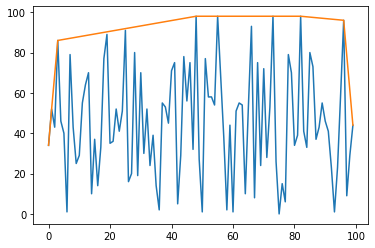

In [40]:
plt.plot([i for i in range(len(v))],[i for i in v])
plt.plot([i for i in range(len(v))],[i for i in convex_hull(v)])

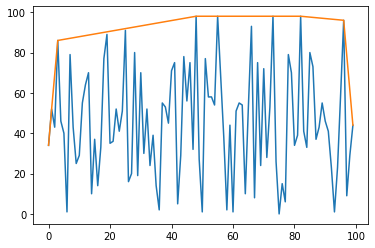

In [41]:
plt.plot([i for i in range(len(v))],[i for i in v])
plt.plot([i for i in range(len(v))],[i for i in convex_hull_2(v)])